In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
eps=0.001
alif=1
funk=0
grad=0
it=0
def roz(x):
  global funk
  funk+=1
  return alif*(x[0]**2-x[1])**2+(x[0]-1)**2

def squ(x):
  global funk
  funk+=1
  return 5*x[0]*x[0] + 4*x[0]*x[1]+2*x[1]*x[1]+4*math.sqrt(5)*(x[0]+x[1])-14

def antigrad(x,roz):
    global grad
    grad+=1
    if(roz([1,1])<0.000001):#roz=="roz"
      return np.array([-alif*4*x[0]*(x[0]**2-x[1])-2*(x[0]-1), alif*2*(x[0]**2-x[1])])
    else:
      return np.array([-10*x[0]-4*x[1]-4*math.sqrt(5), -4*x[0] -4*x[1]-4*math.sqrt(5)])

def norm(x):
    nor=0
    for i in range(len(x)):
        nor +=x[i]*x[i]
    return math.sqrt(nor)
def H(x,roz):
  if(roz([1,1])<0.000001):
    return np.array([[4*alif*(x[0]**2-x[1])+4*alif*x[0]*2*x[0]+2,-4*alif*x[0]],[-2*alif*2*x[0], 2*alif]])
  return np.array([[10,4],[4,4]])

def gold(epsg,point,roz,antigr):
    global itf
    a=5
    b=-5
    delt=(b-a)*(math.sqrt(5)-2)/2
    x1=(a+b)/2 -delt
    x2=(a+b)/2 +delt
    f1=roz(point + x1 * antigr)
    f2=roz(point + x2 * antigr)
    while(math.fabs(b-a)>=epsg):
        #itf+=1
        if(f1<f2):
            b=x2
            x2=x1
            x1=a+b-x2
            f2=f1

            f1=roz(point + x1 * antigr)
        else:
            a=x1
            x1=x2
            x2=a+b-x1
            f1=f2
            f2=roz(point + x2 * antigr)
        delt=(b-a)*(math.sqrt(5)-2)/2
    return (a+b)/2



def flatch(roz,x0):
  global unsv1,unsv1s,it
  if(abs(roz([1,1]))<0.000001):
      unsv1.append(x0)
  else:
      unsv1s.append(x0)
  p=antigrad(x0,roz)
  k=1
  while(norm(antigrad(x0,roz))>eps):
    it+=1
    kappa=gold(0.0001,x0,roz,p)
    x=x0+kappa*p
    ant=antigrad(x,roz)
    if(norm(ant)<eps):
      print(x)
      return 0
    if(k%10000==0):
      p=ant
    else:
      if((norm(antigrad(x0,roz))**2)<0.00001):
        return 0
      p = (((norm(ant))**2) / (norm(antigrad(x0,roz)))**2) * p + ant;
    x0=x
    k+=1


    if(abs(roz([1,1]))<0.000001):
      unsv1.append(x)
    else:
      unsv1s.append(x)

    if(k>100000):
      print(x0)
      return 0
  print(x0)


def polac(roz,x0):
  global unsv2,unsv2s,it
  p=antigrad(x0,roz)
  k=1
  while(norm(antigrad(x0,roz))>eps):
    it+=1
    kappa=gold(0.0001,x0,roz,p)
    x=x0+kappa*p
    if(k%10000==0):
      p=antigrad(x,roz)
    else:
      p = np.dot((antigrad(x,roz)-antigrad(x0,roz)),antigrad(x,roz)) / (norm(antigrad(x0,roz))*norm(antigrad(x0,roz)))*p  + antigrad(x,roz)
    x0=x
    k+=1


    if(roz([1,1])<0.000001):
      unsv2.append(x)
    else:
      unsv2s.append(x)

    if(k>100000):
      print(x0)
      return 0
  print(x0)

def sopr(roz,x0):
  global unsv3,unsv3s
  if(roz([1,1])<0.000001):
    unsv3.append(x0)
  else:
    unsv3s.append(x0)
  p=antigrad(x0,roz)
  k=1
  while(norm(antigrad(x0,roz))>eps):
    kappa=gold(0.0001,x0,roz,p)
    x=x0+kappa*p
    if(k%2==0):
      p=antigrad(x,roz)
    else:
      hp=np.dot(H(x0,roz),p.T)
      p=-p*np.dot(hp,antigrad(x0,roz))/np.dot(hp,p)+antigrad(x,roz)

    x0=x
    k+=1


    if(roz([1,1])<0.000001):
      unsv3.append(x)
    else:
      unsv3s.append(x)

    if(k>100000):
      print(x0)
      return 0
  print(x0)

unsv1=[]
unsv2=[]
unsv3=[]
unsv1s=[]
unsv2s=[]
unsv3s=[]
x0=np.array([-1,-2])
flatch(roz,x0)
print(funk)
print(grad)
funk=0
grad=0
polac(roz,x0)
print(funk)
print(grad)
sopr(roz,x0)
funk=0
grad=0
it=0
flatch(squ,x0)
print(it)
print(funk)
print(grad)
it=0
polac(squ,x0)
print(it)
sopr(squ,x0)



589
76
[0.99999708 0.99998096]
240
51
[0.9990749  0.99774317]
[ 7.01074788e-05 -2.23606262e+00]
2
61
7
[-6.82191479e-06 -2.23608857e+00]
2
[-5.11876016e-05 -2.23595876e+00]


<a list of 6 text.Text objects>

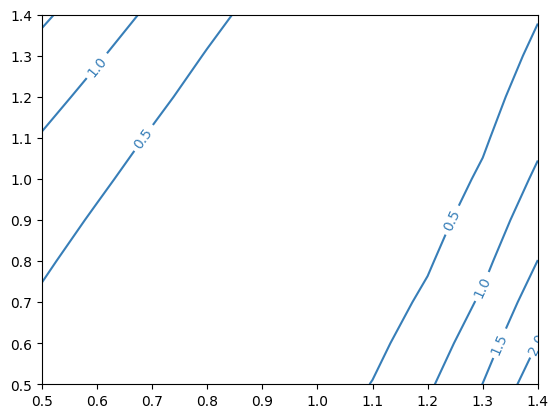

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = alif*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(0.5, 1.5,0.1)
y = np.arange(0.5, 1.5,0.1)

Z = np.ones((10,10))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

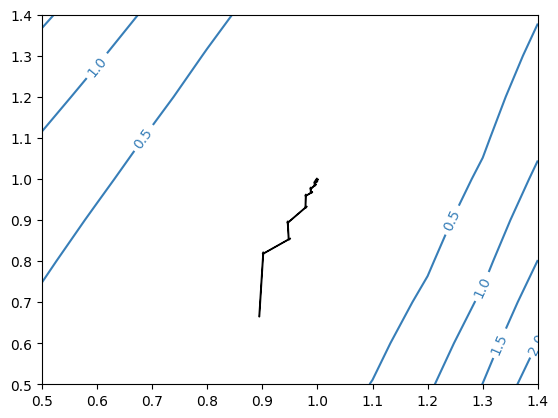

In [ ]:

cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(6,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

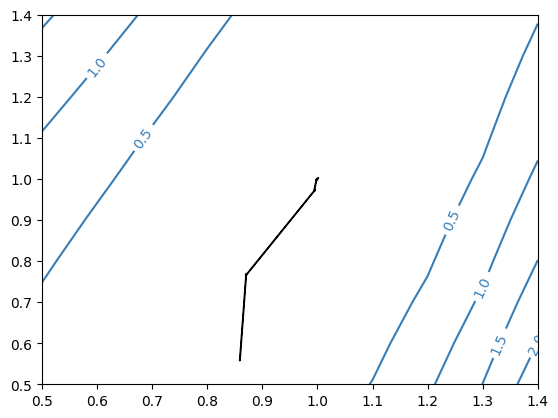

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(3,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

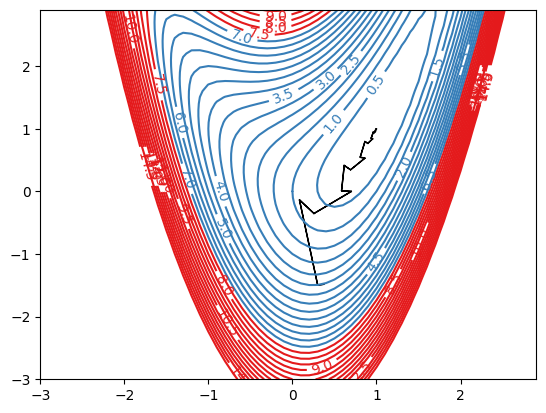

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv3:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

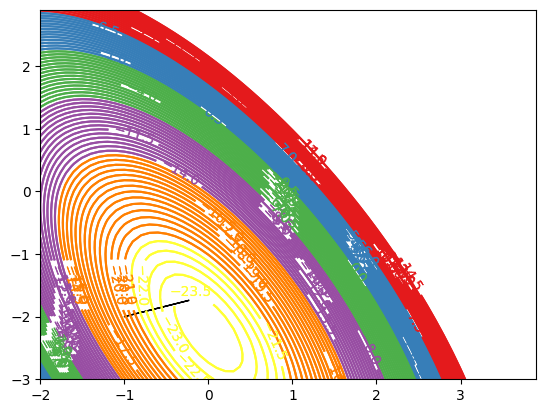

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 5*z[0]*z[0] + 4*z[0]*z[1]+2*z[1]*z[1]+4*math.sqrt(5)*(z[0]+z[1])-14

X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-2.0, 4.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1s:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2s:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv3s:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

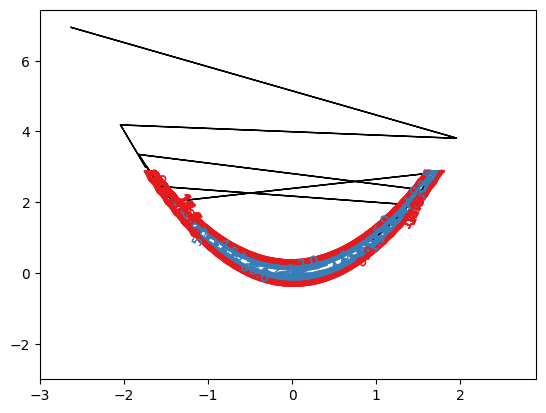

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = alif*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    #if(i[0]<3 and i[1]<3):
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(324,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

In [ ]:
def polac(roz,x0):
  global unsv2,unsv2s,it
  p=antif(x0,roz)
  k=1
  while(norm(antif(x0,roz))>eps):
    it+=1
    kappa=gold(0.0001,x0,roz,p)
    x=x0+kappa*p
    if(k%10000==0):
      p=antif(x,roz)
    else:
      p = np.dot((antif(x,roz)-antif(x0,roz)),antif(x,roz)) / (norm(antif(x0,roz))*norm(antif(x0,roz)))*p  + antif(x,roz)
    x0=x
    k+=1
    if(k>1000):
      return x0
  return x0

def sopr(roz,x0):
  p=antigrad(x0,roz)
  k=1
  while(norm(antigrad(x0,roz))>eps):
    kappa=gold(0.0001,x0,roz,p)
    x=x0+kappa*p
    if(k%2==0):
      p=antigrad(x,roz)
    else:
      hp=np.dot(H(x0,roz),p.T)
      p=-p*np.dot(hp,antigrad(x0,roz))/np.dot(hp,p)+antigrad(x,roz)
    x0=x
    k+=1
    if(k>1000):
      print(x0)
      return x0
  return x0
